In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Start by building a Dataset generator for our fields

### Now let's design some layers

In [54]:
class Spectrum1D(tf.keras.layers.Layer):
    
    def __init__(self):
        super(Spectrum, self).__init__()
        
    def build(self, input_shape):
        # Compute shape of FFT
        nk = 1
        self.kernel = self.add_weight("spectral_kernel",
                                     shape = (nk,))  # Fix shape
        # Add initialization
        # Warning, we don't want to modify the zero mode
        return
        
    def call(self, inputs):
        n = tf.constant(inputs.shape[-1], shape=(1,))  # Put this into initialisation
        fk = tf.signal.rfft(inputs)
        
        # Multiply by square root of spectrum (and make this learnable)
        # Should somehow impose that window is positive semi-definite or something
        # fk[2:] = fk[2:]*self.window
        
        return tf.signal.irfft(fk, fft_length=n)


In [58]:
class LocalMap(tf.keras.layers.Layer):
    
    def __init__(self, order):
        super(LocalMap, self).__init__()
        self.order = order
        self.add_weight("map",
                       shape = (self.order,))
        
    def call(self, inputs):
        return inputs
    

In [59]:
data = tf.constant(tf.sin(3.*np.linspace(0.,2.*np.pi,201,endpoint=False)))

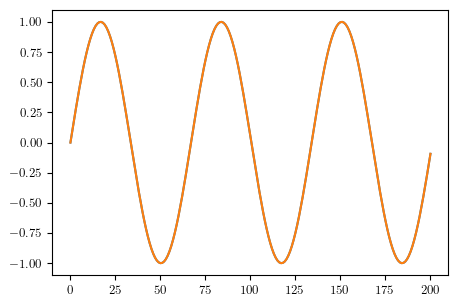

In [60]:
spec = Spectrum()
data_ = spec(data)

plt.plot(data_)
plt.plot(data)